### Sports Image Classification

In [32]:
# tensor imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import metrics
from sklearn.metrics import confusion_matrix


In [33]:
# Using the ImageDataGenerator rescale the image to standard size for all the images in train and validation directories. 
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)


In [34]:
# These generators are used to provide batches of images to the CNN model during training (train_generator) and validation (valid_generator).
train_generator = train_datagen.flow_from_directory('train', target_size=(224, 224), class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('valid', target_size=(224, 224), class_mode='categorical')


Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [35]:
# Read the CSV file which has the label for each sports class. 
train_labels_df = pd.read_csv('sports.csv')
train_labels_df.head()

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train


In [36]:
# Get one batch of data
images, ohe_labels = next(train_generator)

# Check the shape of images and labels
print("Image batch shape:", images.shape)  # E.g., (batch_size, 224, 224, 3)
print("Label batch shape:", ohe_labels.shape)  # E.g., (batch_size, num_classes)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 100)


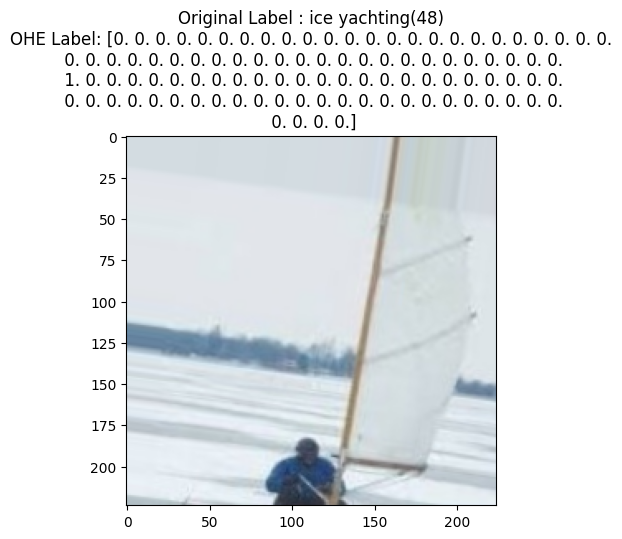

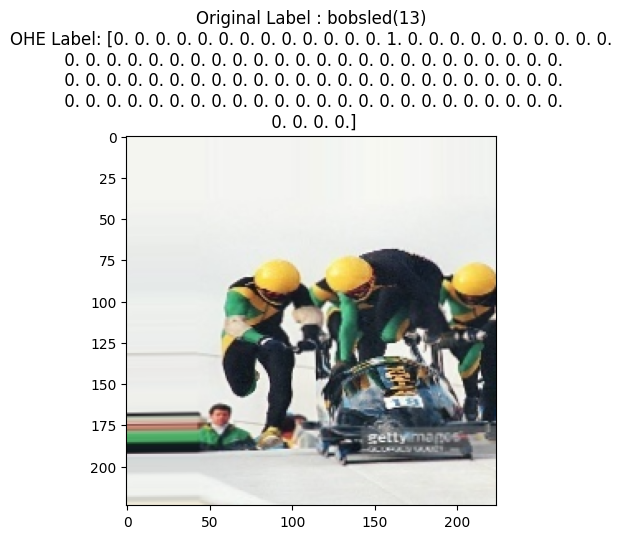

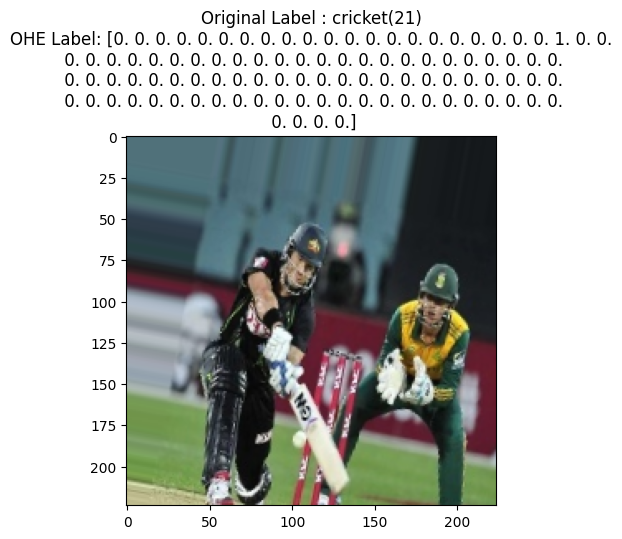

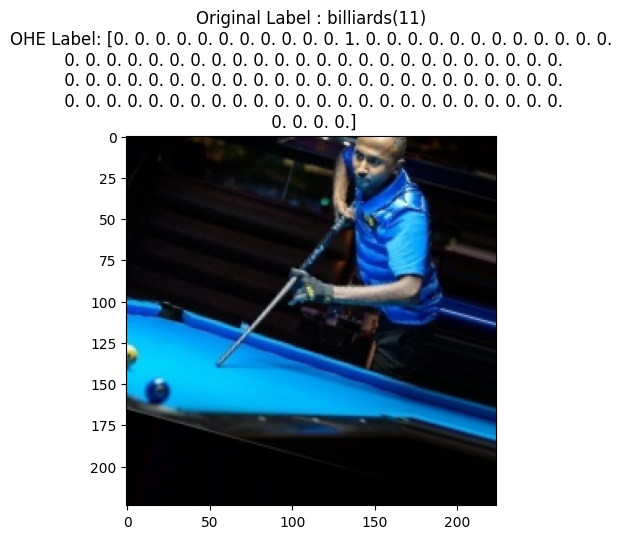

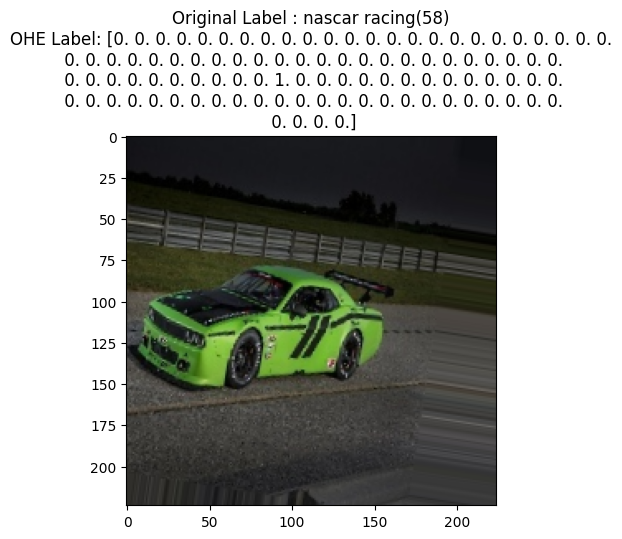

In [37]:
# Convert one-hot encoded labels to original class numbers using np.argmax
original_labels = np.argmax(ohe_labels, axis=1)
#print(train_labels_df['labels'][train_labels_df['class id'] == 0].iloc[0])

# Visualize the first 5 images
for i in range(5):
    display_label_name = train_labels_df['labels'][train_labels_df['class id'] == original_labels[i]].iloc[0]
    plt.imshow(images[i])
    plt.title(f'Original Label : {display_label_name}({original_labels[i]})\nOHE Label: {ohe_labels[i]}')
    plt.show()

#### Build the model

In [38]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=54, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.15),
    Dense(100, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Users/chandantiwari/chandan/tech/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# fit the model
history = model.fit(train_generator, epochs=15, validation_data=valid_generator)


Epoch 1/15


/Users/chandantiwari/chandan/tech/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 268s 631ms/step - accuracy: 0.0298 - loss: 4.4987 - val_accuracy: 0.1460 - val_loss: 3.5475
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 283s 667ms/step - accuracy: 0.1463 - loss: 3.5450 - val_accuracy: 0.2300 - val_loss: 3.1059
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.2163 - loss: 3.1396 - val_accuracy: 0.3040 - val_loss: 2.7976
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 277s 653ms/step - accuracy: 0.2724 - loss: 2.9067 - val_accuracy: 0.3140 - val_loss: 2.6620
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 266s 627ms/step - accuracy: 0.2975 - loss: 2.7408 - val_accuracy: 0.3200 - val_loss: 2.4974
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 335s 792ms/step - accuracy: 0.3214 - loss: 2.6158 - val_accuracy: 0.4100 - val_loss: 2.3575
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 277s 654ms/step - accuracy: 0.3478 - loss: 2.5051 - val_accuracy: 0.4300 - val_loss: 2.1885
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 274s 645ms/step - accuracy: 0.3673 - loss: 2.4069 

#### Augment Test Data and Model Evaluate

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_generator = test_datagen.flow_from_directory('test', target_size=(224, 224), class_mode='categorical')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}\nTest Loss: {test_loss}')


Found 500 images belonging to 100 classes.


/Users/chandantiwari/chandan/tech/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5159 - loss: 1.7681
Test Accuracy: 0.5139999985694885
Test Loss: 1.7584360837936401


#### Save the model

In [41]:
model.save('sports_classifier_model.h5')

#### Visualize Performance


In [42]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.059146,4.207737,0.146,3.547482
1,0.162467,3.448243,0.230,3.105895
2,0.224578,3.108060,0.304,2.797609
3,0.270012,2.894626,0.314,2.661986
4,0.300104,2.732646,0.320,2.497415
5,0.326342,2.601056,0.410,2.357488
6,0.350282,2.499311,0.430,2.188536
7,0.368737,2.411448,0.414,2.261830
8,0.392010,2.309605,0.454,2.190340
9,0.408390,2.243829,0.418,2.140030


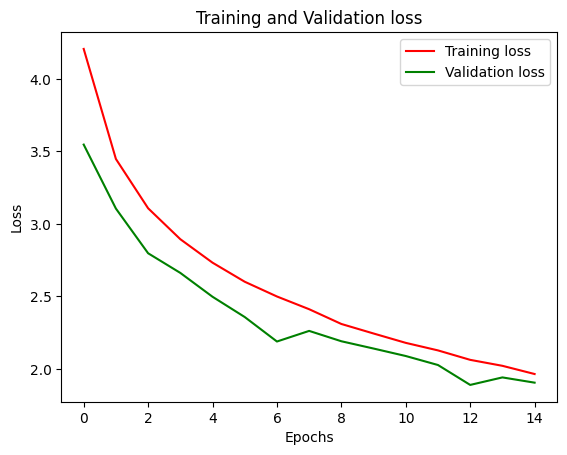

In [43]:
# Plotting training and validation loss over epochs
plt.plot(history_df.loc[:, ['loss']], "red", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"green", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

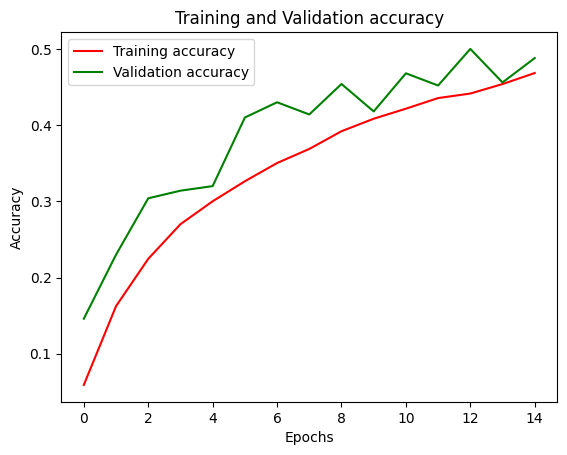

In [44]:
# Plotting training and validation accuracy over epochs
plt.plot(history_df.loc[:, ['accuracy']], "red", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "green", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()